In [175]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from datetime import timedelta

In [176]:
tickerName = input("Input Ticker Symbol ")
ticker = yf.Ticker(tickerName)
dataframe = ticker.history(period="5y")

Input Ticker Symbol MSFT


In [177]:
dataframe = dataframe[['Close']]
date

Index(['2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-19',
       '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-25', '2016-01-26',
       ...
       '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-04',
       '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11'],
      dtype='object', name='Date', length=1259)

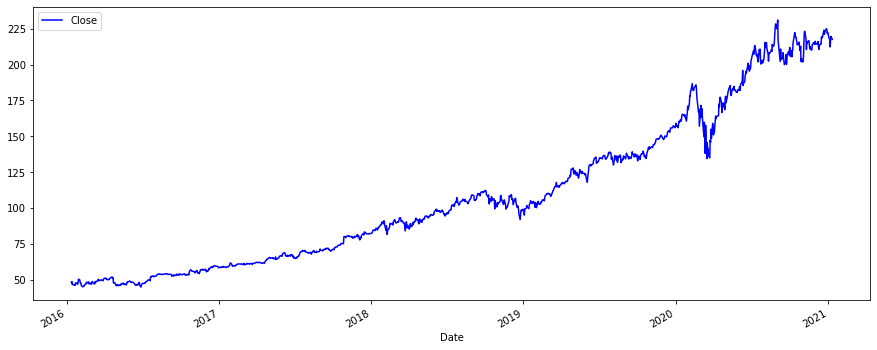

In [178]:
dataframe.plot(figsize=(15,6), color = 'b')

In [179]:
predictionStep = 30
dataframe['Predicted Values'] = dataframe.shift(-predictionStep)

x = np.array(dataframe.drop(['Predicted Values'], 1))
x = preprocessing.scale(x)

x_predicted = x[-predictionStep:]
x = x[:-predictionStep]

y = np.array(dataframe['Predicted Values'])
y = y[:-predictionStep]

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
estimator = LinearRegression()
estimator.fit(x_train, y_train)

LinearRegression()

In [181]:
confidence = estimator.score(x_test, y_test)
predicted_value = estimator.predict(x_predicted)
print 

<function print>

In [182]:
dates = pd.date_range(start = date[-1], end = datetime.datetime.strptime(date[-1], '%Y-%m-%d') + datetime.timedelta(days = 29) )

(737585.0, 737922.75)

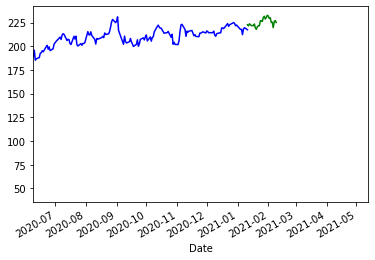

In [189]:
plt.plot(dates, predicted_value, color='g')
dataframe['Close'].plot(color='b')
plt.xlim(xmin = date[-150])